## Classificação

https://medium.com/data-hackers/engenharia-de-features-transformando-dados-categ%C3%B3ricos-em-dados-num%C3%A9ricos-e5d3991df715

https://medium.com/@lucas.lyon96/qual-modelo-de-machine-learning-escolher-para-o-meu-problema-8874c2bc8517

https://www.flai.com.br/juscudilio/parte-iii-como-utilizar-modelos-de-machine-learning-para-reduzir-o-churn/

https://tatianaesc.medium.com/implementando-um-modelo-de-classifica%C3%A7%C3%A3o-no-scikit-learn-6206d684b377

https://maelyalways.medium.com/scikit-learn-classifica%C3%A7%C3%A3o-tutorial-712e900364c5

https://www.digitalocean.com/community/tutorials/como-construir-um-classificador-de-machine-learning-em-python-com-scikit-learn-pt

https://dadosaocubo.com/classificacao-com-scikit-learn/

https://caiquecoelho.medium.com/um-guia-completo-para-o-pr%C3%A9-processamento-de-dados-em-machine-learning-f860fbadabe1

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from skopt import BayesSearchCV

In [2]:
colunas = ['categoria_adm_IES', 'organizacao_academica', 'nome_curso', 'turno', 'regiao', 'uf',
       'range_idade', 'range_idade_comeco_graduacao', 'range_tempo_ocioso', 'tempo_cursado', 'recebeu_cota', 
       'ensino_medio', 'tipo_ensino_medio', 'escolaridade_pai', 'escolaridade_mae',
       'estado_civil', 'cor_raca', 'sexo', 'moradia', 'pessoas_moradia',
       'trabalha', 'renda_familiar', 'livros_ano', 'horas_estudo',
       'condicoes_salas_estudantes', 'condicoes_praticas_materiais',
       'plano_ensino', 'avaliacao_curso', 'nt_geral_categoria']

In [3]:
enade_df = pd.read_csv('enade_merge_08-11-14-17.csv',sep=',',decimal='.', usecols=colunas)

In [4]:
enade_df

,categoria_adm_IES,organizacao_academica,nome_curso,turno,regiao,uf,range_idade,range_idade_comeco_graduacao,range_tempo_ocioso,tempo_cursado,...,recebeu_cota,escolaridade_pai,escolaridade_mae,livros_ano,horas_estudo,condicoes_salas_estudantes,condicoes_praticas_materiais,plano_ensino,avaliacao_curso,nt_geral_categoria
0,IES pública,C.F.E.T,RC,Noturno,SE,ES,20-23,17-21,0-2,4,...,Não,Ensino Fundamental,Ensino Fundamental,0,8+,Todas,Todas,Todos aspectos,Muito boa,Baixa
1,IES privada,Faculdade,SI,Noturno,NE,PB,20-23,17-21,0-2,4,...,Sim,Ensino Fundamental,Ensino Fundamental,3-5,3-8,Todas,Todas,Maior parte,Boa,Baixa
2,IES pública,C.F.E.T,RC,Diurno,SE,ES,24-27,17-21,0-2,4,...,Não,Ensino Médio,Ensino Fundamental,3-5,3-8,Maior parte,Maior parte,Todos aspectos,Muito boa,Alta
3,IES pública,C.F.E.T,RC,Diurno,SE,ES,20-23,17-21,0-2,3,...,Não,Nenhuma,Ensino Médio,3-5,8+,Maior parte,Maior parte,Nenhum,Muito boa,Baixa
4,IES privada,Centro Universitário,SI,Noturno,SE,MG,20-23,17-21,0-2,3,...,Não,Ensino Fundamental,Ensino Médio,0,3-8,Todas,Todas,Todos aspectos,Boa,Baixa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64218,IES privada,Centro Universitário,ADS,Noturno,NE,BA,20-23,17-21,0-2,4,...,Não,Ensino Médio,Ensino Médio,0,3-8,Maior parte,Maior parte,Nenhum,Muito boa,Baixa
64219,IES privada,Centro Universitário,ADS,Noturno,NE,BA,20-23,17-21,0-2,4,...,Não,Ensino Médio,Ensino Médio,0,<3,Maior parte,Maior parte,Maior parte,Regular,Alta
64220,IES privada,Centro Universitário,ADS,Noturno,NE,BA,20-23,17-21,0-2,4,...,Não,Ensino Médio,Ensino Superior,3-5,8+,Todas,Todas,Todos aspectos,Muito boa,Baixa
64221,IES privada,Centro Universitário,RC,Noturno,NE,BA,32-35,26-29,9-11,4,...,Não,Ensino Médio,Ensino Superior,1/2,<3,Maior parte,Maior parte,Todos aspectos,Boa,Baixa


In [5]:
for i in colunas:
    print(i,':', enade_df[i].unique())
    print()

categoria_adm_IES : ['IES pública' 'IES privada']

organizacao_academica : ['C.F.E.T' 'Faculdade' 'Centro Universitário' 'Instituto Superior'
 'Universidade' 'I.F.E']

nome_curso : ['RC' 'SI' 'ADS' 'EC' 'BCC' 'LCC' 'GTI']

turno : ['Noturno' 'Diurno' 'Integral']

regiao : ['SE' 'NE' 'N' 'S' 'CO']

uf : ['ES' 'PB' 'MG' 'BA' 'SP' 'AM' 'RJ' 'SC' 'RS' 'PE' 'PR' 'CE' 'MA' 'AP'
 'PA' 'GO' 'MT' 'AL' 'TO' 'DF' 'RN' 'PI' 'RO' 'RR' 'MS' 'SE' 'AC']

range_idade : ['20-23' '24-27' '36-38' '32-35' '28-31']

range_idade_comeco_graduacao : ['17-21' '30-33' '22-25' '26-29']

range_tempo_ocioso : ['0-2' '5-6' '7-8' '3-4' '9-11']

tempo_cursado : [4 3 5]

recebeu_cota : ['Não' 'Sim']

ensino_medio : ['EM tradicional' 'Profissionalizante magistério'
 'Profissionalizante técnico' 'EJA/Supletivo' 'Outro']

tipo_ensino_medio : ['Pública' 'Particular' 'Exterior']

escolaridade_pai : ['Ensino Fundamental' 'Ensino Médio' 'Nenhuma' 'Ensino Superior']

escolaridade_mae : ['Ensino Fundamental' 'Ensino Médio' 'Ens

In [6]:
binarias = ['categoria_adm_IES','recebeu_cota','sexo','trabalha', 'nt_geral_categoria']

In [7]:
# translate_df = {}
label_encoder = LabelEncoder()

#transformando categoria de cada coluna em numeros
for i in binarias:
    enade_df[i] = label_encoder.fit_transform(enade_df[i])
    # translate_df[i] = list(label_encoder.classes_)

In [8]:
# One hot encode

new_df = pd.DataFrame()

new_df = pd.get_dummies(data = enade_df, columns = list(set(colunas).difference(binarias)) )

# new_df = pd.concat([new_df, enade_df[binarias]], axis=1)

In [9]:
new_df

,categoria_adm_IES,sexo,trabalha,recebeu_cota,nt_geral_categoria,range_tempo_ocioso_0-2,range_tempo_ocioso_3-4,range_tempo_ocioso_5-6,range_tempo_ocioso_7-8,range_tempo_ocioso_9-11,...,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Outro,estado_civil_Solteiro,estado_civil_Viúvo,plano_ensino_Maior parte,plano_ensino_Nenhum,plano_ensino_Não se aplica,plano_ensino_Somente alguns,plano_ensino_Todos aspectos
0,1,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,1,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64218,0,1,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
64219,0,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
64220,0,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
64221,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [10]:
nova_colunas = new_df.columns

In [11]:
for i in nova_colunas:
    new_df[i] = new_df[i].astype({i:int})

In [12]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64223 entries, 0 to 64222
Data columns (total 144 columns):
 #    Column                                      Dtype
---   ------                                      -----
 0    categoria_adm_IES                           int64
 1    sexo                                        int64
 2    trabalha                                    int64
 3    recebeu_cota                                int64
 4    nt_geral_categoria                          int64
 5    range_tempo_ocioso_0-2                      int64
 6    range_tempo_ocioso_3-4                      int64
 7    range_tempo_ocioso_5-6                      int64
 8    range_tempo_ocioso_7-8                      int64
 9    range_tempo_ocioso_9-11                     int64
 10   nome_curso_ADS                              int64
 11   nome_curso_BCC                              int64
 12   nome_curso_EC                               int64
 13   nome_curso_GTI                              

In [13]:
new_df

,categoria_adm_IES,sexo,trabalha,recebeu_cota,nt_geral_categoria,range_tempo_ocioso_0-2,range_tempo_ocioso_3-4,range_tempo_ocioso_5-6,range_tempo_ocioso_7-8,range_tempo_ocioso_9-11,...,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Outro,estado_civil_Solteiro,estado_civil_Viúvo,plano_ensino_Maior parte,plano_ensino_Nenhum,plano_ensino_Não se aplica,plano_ensino_Somente alguns,plano_ensino_Todos aspectos
0,1,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,1,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64218,0,1,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
64219,0,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
64220,0,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
64221,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [14]:
new_df.to_csv('./{}.csv'.format('enade_classifier'),index=False,float_format='%.2f')

### Feature selection

In [15]:
features = new_df.loc[:, new_df.columns != 'nt_geral_categoria']

X = features
y = new_df['nt_geral_categoria'] #variavel alvo

In [16]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)

# Colocando label nos resultados para posterior plot
scores = pd.Series(chi_scores[0], index=X.columns)
pvalues = pd.Series(chi_scores[1], index=X.columns)

chi2df = pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})
chi2df = chi2df.sort_values(by='Chi2', ascending = False)
chi2df

,Chi2,p-Value
categoria_adm_IES,2005.795961,0.000000e+00
turno_Integral,1698.052300,0.000000e+00
horas_estudo_8+,573.298013,1.076252e-126
turno_Noturno,503.422723,1.711039e-111
organizacao_academica_Faculdade,492.325129,4.445216e-109
...,...,...
estado_civil_Viúvo,0.537009,4.636751e-01
cor_raca_Amarela,0.317493,5.731181e-01
escolaridade_pai_Ensino Médio,0.313272,5.756790e-01
uf_MA,0.150984,6.975966e-01


In [17]:
chi2df.reset_index(level=0, inplace=True)
chi2df.rename(columns={'index':'feature'}, inplace=True)

In [18]:
chi2df

,feature,Chi2,p-Value
0,categoria_adm_IES,2005.795961,0.000000e+00
1,turno_Integral,1698.052300,0.000000e+00
2,horas_estudo_8+,573.298013,1.076252e-126
3,turno_Noturno,503.422723,1.711039e-111
4,organizacao_academica_Faculdade,492.325129,4.445216e-109
...,...,...,...
138,estado_civil_Viúvo,0.537009,4.636751e-01
139,cor_raca_Amarela,0.317493,5.731181e-01
140,escolaridade_pai_Ensino Médio,0.313272,5.756790e-01
141,uf_MA,0.150984,6.975966e-01


In [19]:
chi2df.head(62)

,feature,Chi2,p-Value
0,categoria_adm_IES,2005.795961,0.000000e+00
1,turno_Integral,1698.052300,0.000000e+00
2,horas_estudo_8+,573.298013,1.076252e-126
3,turno_Noturno,503.422723,1.711039e-111
4,organizacao_academica_Faculdade,492.325129,4.445216e-109
...,...,...,...
57,nome_curso_RC,48.382799,3.506303e-12
58,range_tempo_ocioso_7-8,48.164646,3.918908e-12
59,pessoas_moradia_Quatro,48.137250,3.974047e-12
60,uf_PI,47.930570,4.415825e-12


<AxesSubplot:xlabel='feature'>

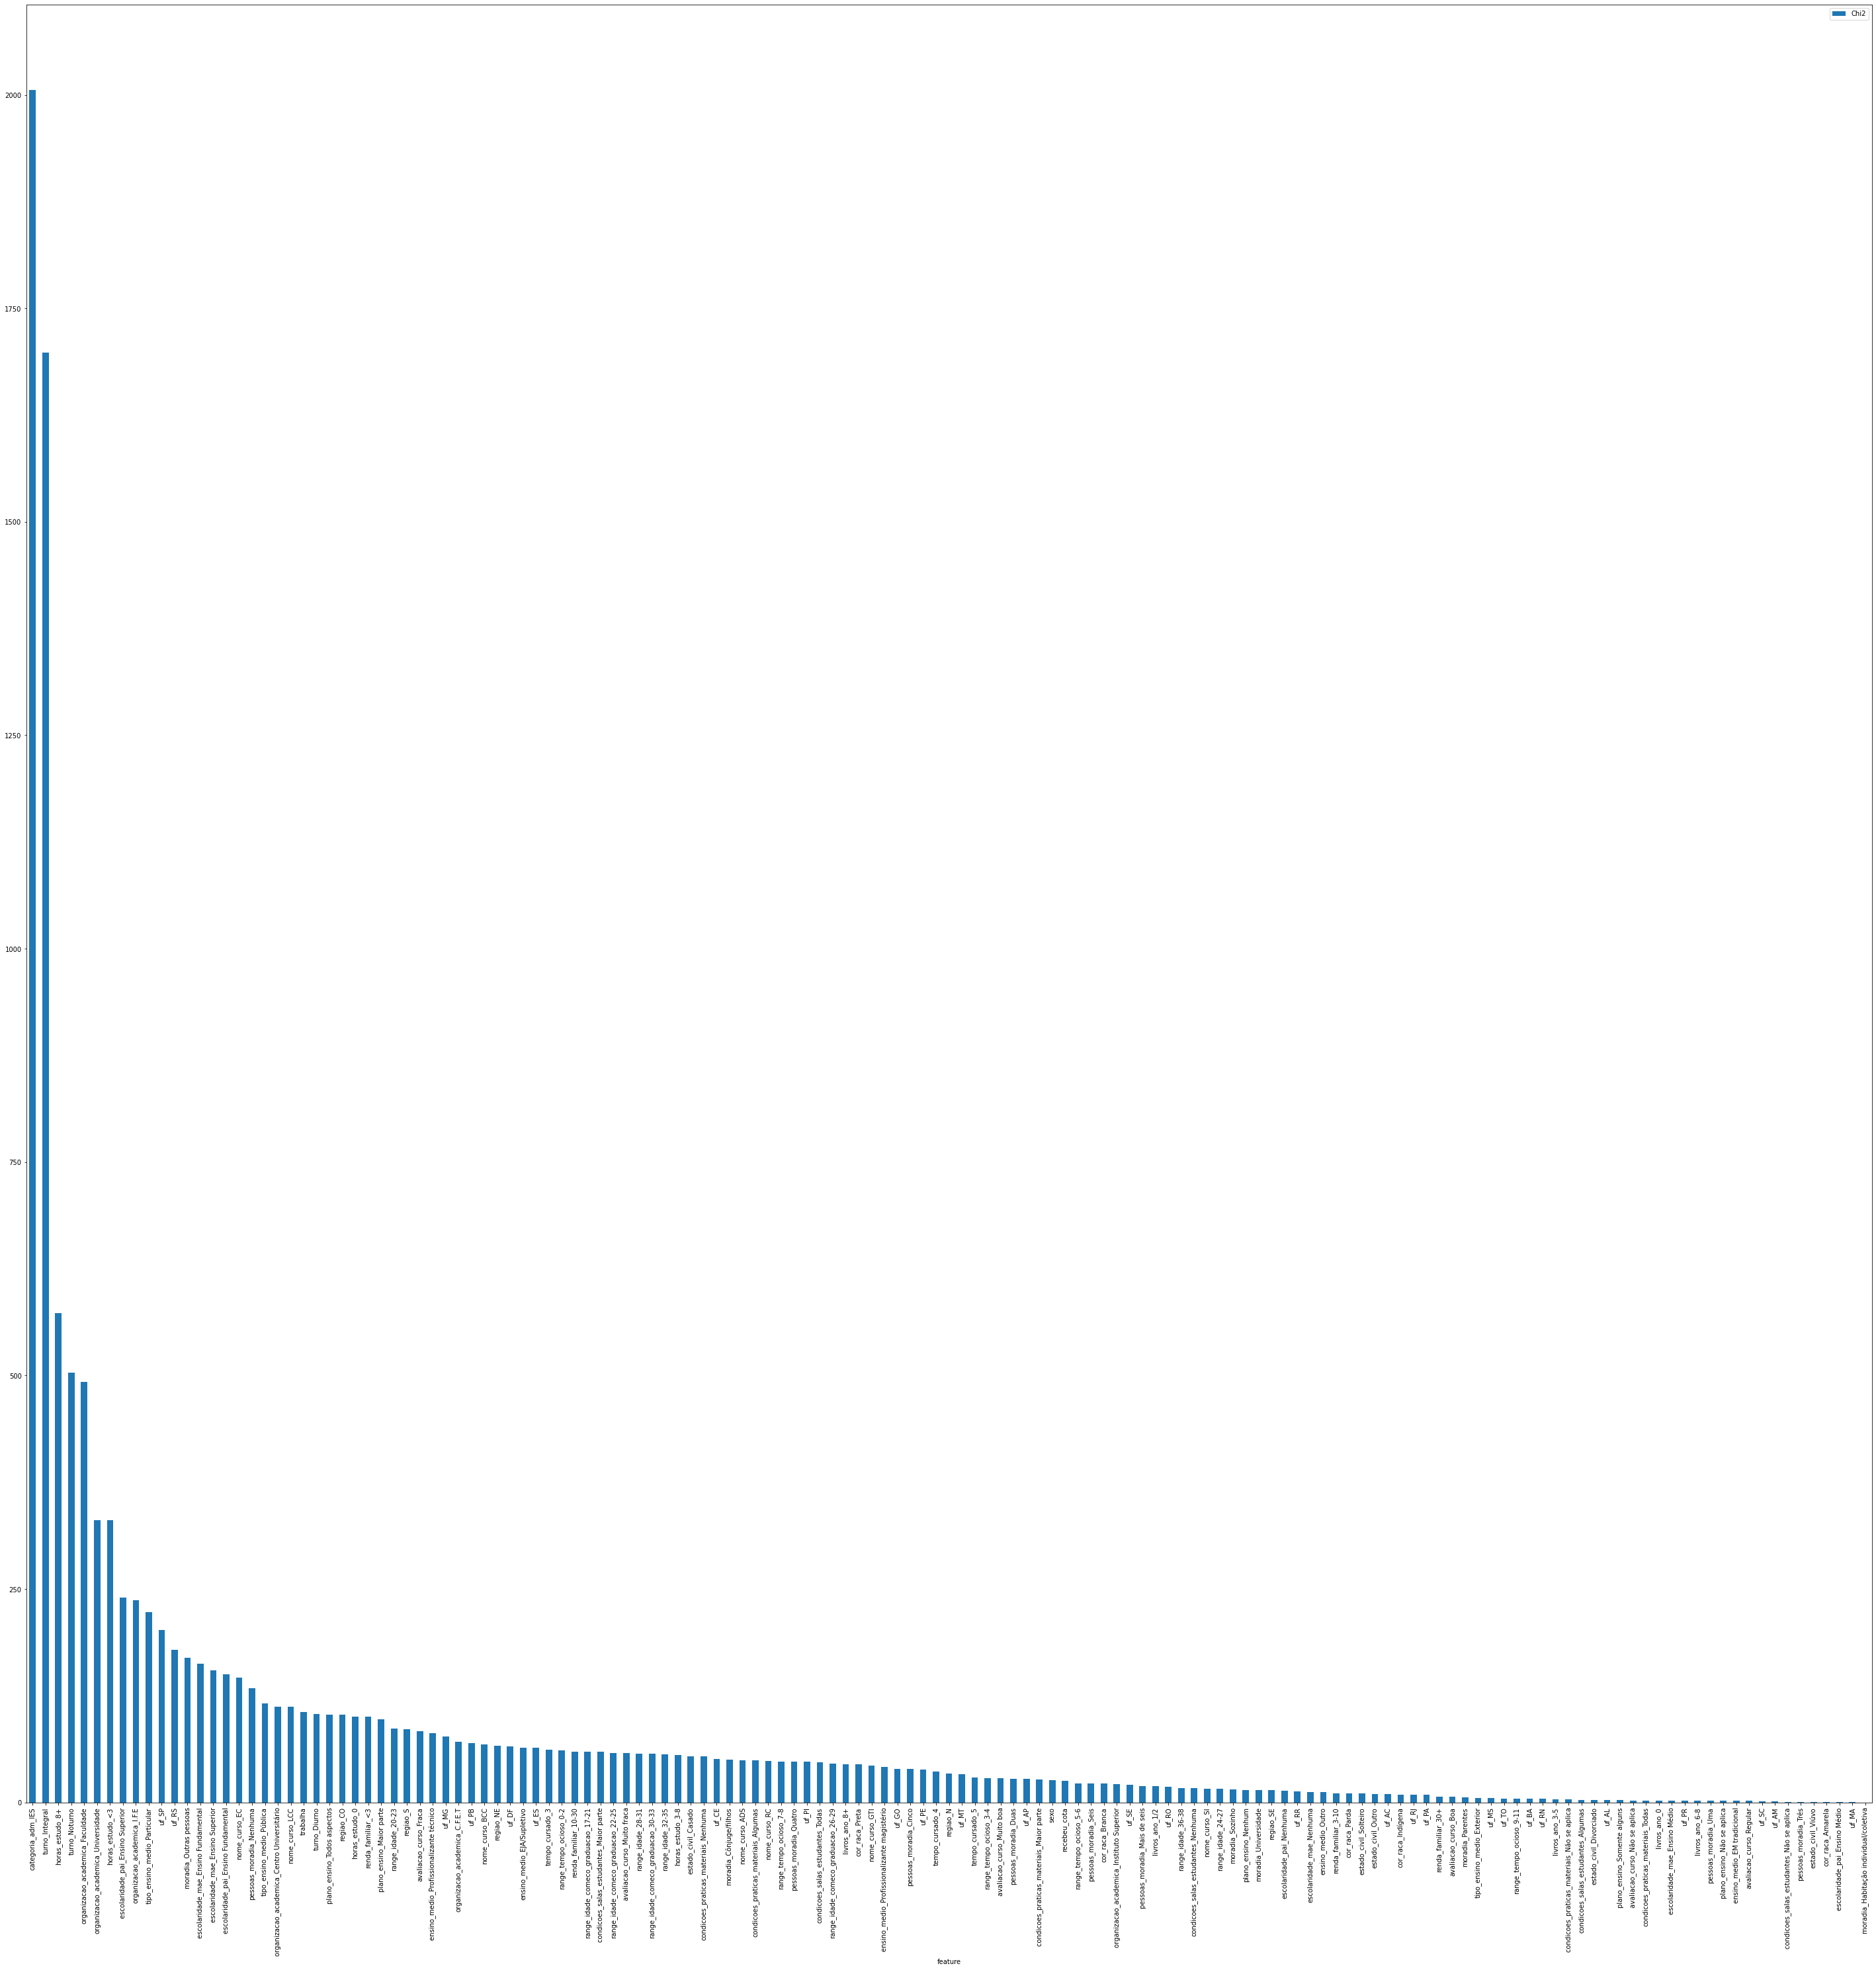

In [20]:
chi2df.plot.bar(x='feature', y = 'Chi2', figsize=(50,50))

In [21]:
from sklearn.feature_selection import SelectKBest
#só funciona com numeros

X_10 = SelectKBest(k=10, score_func=chi2).fit_transform(X, y)
X_30 = SelectKBest(k=30, score_func=chi2).fit_transform(X, y)
X_50 = SelectKBest(k=50, score_func=chi2).fit_transform(X, y)
X_70 = SelectKBest(k=70, score_func=chi2).fit_transform(X, y)
X_62 = SelectKBest(k=62, score_func=chi2).fit_transform(X, y)
X_6 = SelectKBest(k=6, score_func=chi2).fit_transform(X, y)
X_81 = SelectKBest(k=81, score_func=chi2).fit_transform(X, y)


In [22]:
X = X_6

In [23]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Regressao logistica

só funciona com target binario (é ou não é)

In [35]:
# Criando modelo e treinando com os dados de treino
clr = LogisticRegression(solver='saga', multi_class='ovr', max_iter=500)
clr.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_clr = clr.predict(X_test)
resultado_clr

array([1, 0, 0, ..., 0, 0, 0])

In [36]:
print(metrics.classification_report(y_test, resultado_clr))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57      7399
           1       0.64      0.74      0.69      8657

    accuracy                           0.64     16056
   macro avg       0.64      0.63      0.63     16056
weighted avg       0.64      0.64      0.64     16056



In [29]:
print(metrics.classification_report(y_test, resultado_clr))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57      7451
           1       0.64      0.75      0.69      8605

    accuracy                           0.64     16056
   macro avg       0.64      0.63      0.63     16056
weighted avg       0.64      0.64      0.64     16056



In [ ]:
n_scores = cross_val_score(clr, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise', verbose=15)
print(n_scores.mean(), n_scores.std())

### KNN

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_knn = knn.predict(X_test)

In [27]:
print(metrics.classification_report(y_test, resultado_knn))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54      7451
           1       0.61      0.64      0.62      8605

    accuracy                           0.58     16056
   macro avg       0.58      0.58      0.58     16056
weighted avg       0.58      0.58      0.58     16056



In [26]:
#6 best
print(metrics.classification_report(y_test, resultado_knn))

              precision    recall  f1-score   support

           0       0.48      0.60      0.53      7304
           1       0.58      0.46      0.51      8752

    accuracy                           0.52     16056
   macro avg       0.53      0.53      0.52     16056
weighted avg       0.54      0.52      0.52     16056



In [27]:
#81 best
print(metrics.classification_report(y_test, resultado_knn))

              precision    recall  f1-score   support

           0       0.55      0.54      0.55      7399
           1       0.62      0.63      0.62      8657

    accuracy                           0.59     16056
   macro avg       0.59      0.59      0.59     16056
weighted avg       0.59      0.59      0.59     16056



In [27]:
#62 best
print(metrics.classification_report(y_test, resultado_knn))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54      7408
           1       0.61      0.63      0.62      8648

    accuracy                           0.58     16056
   macro avg       0.58      0.58      0.58     16056
weighted avg       0.58      0.58      0.58     16056



In [37]:
#70 best
print(metrics.classification_report(y_test, resultado_knn))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      7386
           1       0.62      0.62      0.62      8670

    accuracy                           0.59     16056
   macro avg       0.58      0.58      0.58     16056
weighted avg       0.59      0.59      0.59     16056



In [30]:
#50 best
print(metrics.classification_report(y_test, resultado_knn))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54      7375
           1       0.61      0.64      0.62      8681

    accuracy                           0.59     16056
   macro avg       0.58      0.58      0.58     16056
weighted avg       0.58      0.59      0.58     16056



In [24]:
#30 best
print(metrics.classification_report(y_test, resultado_knn))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53      7471
           1       0.60      0.64      0.62      8585

    accuracy                           0.58     16056
   macro avg       0.58      0.58      0.58     16056
weighted avg       0.58      0.58      0.58     16056



In [32]:
#10 best
print(metrics.classification_report(y_test, resultado_knn))

              precision    recall  f1-score   support

           0       0.53      0.48      0.50      7425
           1       0.59      0.63      0.61      8631

    accuracy                           0.56     16056
   macro avg       0.56      0.56      0.56     16056
weighted avg       0.56      0.56      0.56     16056



In [21]:
metrics.accuracy_score(y_test,resultado_knn)

0.2987717438743064

In [21]:
n_scores = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise', verbose=15)
print(n_scores.mean(), n_scores.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  1.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  1.9min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.9min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  2.0min remaining:   51.9s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  2.0min remaining:   30.5s


0.5834512866962988 0.007359387194334077


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.4min finished


In [20]:
n_scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise', verbose=15)
print(n_scores.mean(), n_scores.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   22.9s remaining:   34.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   40.7s remaining:   40.7s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   41.2s remaining:   27.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   41.8s remaining:   17.9s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   42.7s remaining:   10.7s


0.299968933759276 0.005876250033343775


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   52.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   52.7s finished


### Arvore de decisao

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_dtc = dtc.predict(X_test)

In [28]:
print(metrics.classification_report(y_test, resultado_dtc))

              precision    recall  f1-score   support

           0       0.62      0.44      0.51      7304
           1       0.62      0.77      0.69      8752

    accuracy                           0.62     16056
   macro avg       0.62      0.61      0.60     16056
weighted avg       0.62      0.62      0.61     16056



In [22]:
print(metrics.classification_report(y_test, resultado_dtc))

              precision    recall  f1-score   support

           0       0.53      0.52      0.52      7451
           1       0.59      0.60      0.59      8605

    accuracy                           0.56     16056
   macro avg       0.56      0.56      0.56     16056
weighted avg       0.56      0.56      0.56     16056



In [29]:
print(metrics.classification_report(y_test, resultado_dtc))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53      7399
           1       0.59      0.58      0.58      8657

    accuracy                           0.56     16056
   macro avg       0.56      0.56      0.56     16056
weighted avg       0.56      0.56      0.56     16056



### Naive Bayes

In [32]:
# Inicializar nosso classificador
gnb = GaussianNB()

# Treinar nosso classificador
model = gnb.fit(X_train, y_train)

preds = gnb.predict(X_test)

In [33]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      7399
           1       0.63      0.62      0.63      8657

    accuracy                           0.60     16056
   macro avg       0.60      0.60      0.60     16056
weighted avg       0.60      0.60      0.60     16056



In [27]:
print(metrics.classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.56      0.66      0.60      7623
           1       0.63      0.52      0.57      8433

    accuracy                           0.59     16056
   macro avg       0.59      0.59      0.59     16056
weighted avg       0.59      0.59      0.59     16056



### SVM

In [29]:
svm = SVC()
svm.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_svm = svm.predict(X_test)

In [30]:
#6 best
print(metrics.classification_report(y_test, resultado_svm))

              precision    recall  f1-score   support

           0       0.62      0.44      0.51      7304
           1       0.62      0.77      0.69      8752

    accuracy                           0.62     16056
   macro avg       0.62      0.61      0.60     16056
weighted avg       0.62      0.62      0.61     16056



In [31]:
#81 best
print(metrics.classification_report(y_test, resultado_svm))

              precision    recall  f1-score   support

           0       0.65      0.50      0.57      7399
           1       0.64      0.77      0.70      8657

    accuracy                           0.65     16056
   macro avg       0.65      0.64      0.63     16056
weighted avg       0.65      0.65      0.64     16056



In [29]:
#62 best
print(metrics.classification_report(y_test, resultado_svm))

              precision    recall  f1-score   support

           0       0.66      0.48      0.55      7408
           1       0.64      0.79      0.71      8648

    accuracy                           0.65     16056
   macro avg       0.65      0.63      0.63     16056
weighted avg       0.65      0.65      0.64     16056



In [32]:
#50 best
print(metrics.classification_report(y_test, resultado_svm))

              precision    recall  f1-score   support

           0       0.66      0.47      0.55      7375
           1       0.64      0.80      0.71      8681

    accuracy                           0.65     16056
   macro avg       0.65      0.63      0.63     16056
weighted avg       0.65      0.65      0.63     16056



In [26]:
#30 best
print(metrics.classification_report(y_test, resultado_svm))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53      7471
           1       0.62      0.78      0.69      8585

    accuracy                           0.63     16056
   macro avg       0.63      0.62      0.61     16056
weighted avg       0.63      0.63      0.62     16056



In [34]:
#10 best
print(metrics.classification_report(y_test, resultado_svm))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50      7425
           1       0.61      0.78      0.69      8631

    accuracy                           0.61     16056
   macro avg       0.62      0.60      0.59     16056
weighted avg       0.62      0.61      0.60     16056



In [29]:
print(metrics.classification_report(y_test, resultado_svm))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61      7623
           1       0.65      0.72      0.68      8433

    accuracy                           0.65     16056
   macro avg       0.65      0.64      0.64     16056
weighted avg       0.65      0.65      0.65     16056



### Hyperparametro

In [ ]:
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-2, 1e-1, 1, 10, 50, 100, 1000]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

bayes_search_cv = BayesSearchCV(estimator = regressor,search_spaces = space, scoring = 'accuracy', 
                              cv = cv, n_iter = 50, random_state=1)

bayes_search_cv.fit(X,y)

#Vamos ver informações relevantes:
print('Melhores parametros: {}'.format(bayes_search_cv.best_params_))
print('Desempenho MAE do melhor modelo: {}'.format(round(bayes_search_cv.best_score_,3)))

### Feature selection

https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

* https://minerandodados.com.br/aprenda-como-selecionar-features-para-seu-modelo-de-machine-learning/

* https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a

https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection

https://www.linkedin.com/pulse/sele%C3%A7%C3%A3o-de-atributos-com-python-hugo-souza/?trk=public_profile_article_view

* https://medium.com/data-hackers/estat%C3%ADstica-para-sele%C3%A7%C3%A3o-de-atributos-81bdc274dd2c

https://machinelearningmastery.com/feature-selection-machine-learning-python/

* https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

https://scikit-learn.org/stable/modules/feature_selection.html

Boas opçoes:

- analise correlacao
- feature importance
- kbest usando chi2 ou f_classif